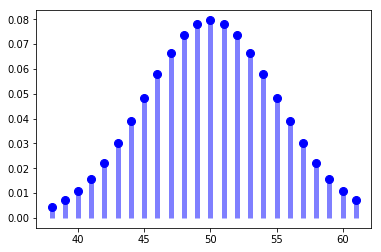

In [26]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

fig, ax = plt.subplots(1, 1)
n, p = 100, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)



(0.033210575620024274, 0.9751466061048992)
normal approximation: 1.0
143.0
Hyp 	 prior 	 posterior
0.5	 0.5 	 0.147572516462
0.55	 0.5 	 0.852427483538


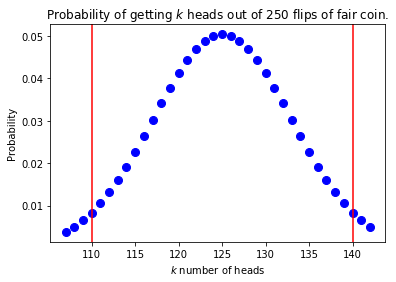

In [73]:
# 7.1
#(a) For H0 = 0.5, what is the probability of getting at least as extreme as 140 heads out of 250 flips?
fig, ax = plt.subplots(1, 1)
n, p = 250, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
r_extreme = 1 - binom.cdf(139, n, p) # the odds of getting at least as extreme as 140 heads.
l_extreme = 1 - binom.cdf(109, n, p) # the odds of getting less than 110 heads.
print(r_extreme, l_extreme)
plt.title('Probability of getting $k$ heads out of 250 flips of fair coin.')
ax.set_xlabel('$k$ number of heads')
ax.set_ylabel('Probability')
ax.axvline(binom.ppf(r_extreme, n, p), c='r')
ax.axvline(binom.ppf(l_extreme, n, p), c='r')

print('normal approximation: ' + str(norm.cdf(125, 250./4)))

# part c. How many heads would you have to observe to reject at sig of alpha = 0.01?
print(binom.ppf(0.99, 250, 0.5))

# part (f). Fix H_A at theta = 0.55. if flat prior (H0=HA = 0.5),
# what is the posterior probability of H_A given the data?
def bayes_formula(hyp=[0.5, 0.55], n=250):
    prior = 0.5
    c2 = 1/(prior**250 + 0.55**140 * 0.45**110)
    print("Hyp \t prior \t posterior")
    for theta in hyp:
        print("{}\t 0.5 \t {}".format(theta, c2 * theta**140 * (1-theta)**110))

bayes_formula()
# then, as per the solutions, use the bayesian beta(141, 111). 
# note to self to go back to beta distribution for estimating 
# 90% ranges of parameters. 

        
    

0.95
0.008197535924596155


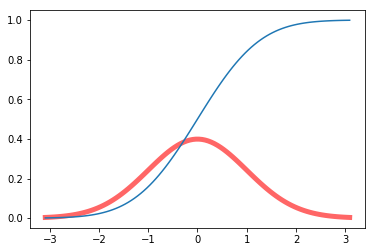

In [56]:
# z-test example from reading 19.
print(norm.cdf(norm.ppf(0.95)))
print(1 - norm.cdf(2.4, 0, 1))
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.999), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.cdf(x))

In [67]:
from scipy.stats import t

# Find the p-value for a one-sample t test of 
# x-bar = 2.2, mu0=0, n = 5 
print(1 - t.cdf(1.901, 4))
print(t.ppf(.95, 4))

0.06504435956601096
2.13184678133629


In [76]:
# Problem 2. H0 = testee truth; HA = testee lying

# (a) Type 1 error: incorrectly rejecting H0, so saying testee is lying when actually telling truth
# Type II error: incorrectly non-rejecting H0, so saying testee is telling truth when actually lying.
# probability: 
N = 131 + 15 + 9 + 125
print('type I: ' + str(9./N))
print('type II: ' + str(15./N))

type I: 0.0321428571429
type II: 0.0535714285714


In [81]:
# Assignment 8, #1. 

# rejection regions for alpha = 0.05
print(binom.ppf(0.05, 12, 0.5) - 1)
print(binom.ppf(0.95, 12, 0.5) + 1)

2.0
10.0
